In [3]:
#https://www.youtube.com/watch?v=fNxaJsNG3-s&list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S

In [4]:
import pandas as pd

In [5]:
clickbait = pd.read_table('data/text_classification/clickbait_data.txt', header=None)
clickbait

,0
0,Should I Get Bings
1,Which TV Female Friend Group Do You Belong In
2,"The New ""Star Wars: The Force Awakens"" Trailer..."
3,"This Vine Of New York On ""Celebrity Big Brothe..."
4,A Couple Did A Stunning Photo Shoot With Their...
...,...
15994,"There Was A Mini ""Sisterhood Of The Traveling ..."
15995,21 Dogs Who Are Thankful For Their Best Friends
15996,People Are Proving No Dick Is Too Big By Dropp...
15997,"I'm An Atheist, But I'm Not"


In [6]:
non_clickbait = pd.read_table('data/text_classification/non_clickbait_data.txt', header=None)
non_clickbait

,0
0,Bill Changing Credit Card Rules Is Sent to Oba...
1,"In Hollywood, the Easy-Money Generation Toughe..."
2,1700 runners still unaccounted for in UK's Lak...
3,Yankees Pitchers Trade Fielding Drills for Put...
4,Large earthquake rattles Indonesia; Seventh in...
...,...
15994,Pentagon unable to explain 'mystery missile' v...
15995,Blair: G8 leaders announce $50 billion aid inc...
15996,"To Make Female Hearts Flutter in Iraq, Throw a..."
15997,"British Liberal Democrat Patsy Calton, 56, die..."


In [7]:
clickbait[1]=1
non_clickbait[1]=0
df = pd.merge(clickbait, non_clickbait, how='outer')
df

,0,1
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31993,Pentagon unable to explain 'mystery missile' v...,0
31994,Blair: G8 leaders announce $50 billion aid inc...,0
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0


In [8]:
import tensorflow as tf
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
from sklearn.model_selection import train_test_split
X = df[0].values
y = df[1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
vocab_size = 50000
embedding_dim = 16
max_length = 1000
trunc_type='post'
padding_type='post'
oov_token = "<OOV>"

In [11]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [12]:
training_sentences = X_train
testing_sentences = X_test
training_labels = y_train
testing_labels = y_test

In [13]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
training_labels

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 16)          800000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 800,433
Trainable params: 800,433
Non-trainable params: 0
__________________________________________________

In [16]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing t

In [17]:
actual_data = pd.read_csv('data/test_data/titles.csv',sep=';',header=None)
actual_data = actual_data[0].values.tolist()

In [18]:
sequences = tokenizer.texts_to_sequences(actual_data)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
classification_result = model.predict(padded)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 0s 2ms/step


In [19]:
hand_classified = pd.read_fwf("data/test_data/hand_classified.txt")
hand_classified = hand_classified["0"]
hand_classified

0     0
1     0
2     0
3     1
4     1
5     0
6     0
7     1
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    1
26    0
27    0
28    0
29    1
30    0
31    0
32    0
33    1
34    0
35    0
36    1
37    0
38    1
39    1
40    1
41    1
42    0
43    0
Name: 0, dtype: int64

In [29]:
correct = np.zeros(len(hand_classified))
num_correct = 0
for index in range(len(hand_classified)):
    if hand_classified[index] == round(classification_result[index][0]):
        correct[index] = 1
        num_correct = num_correct + 1
print(correct)
percentage_correct = num_correct/len(hand_classified)
print(percentage_correct)

[1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1.]
0.6136363636363636


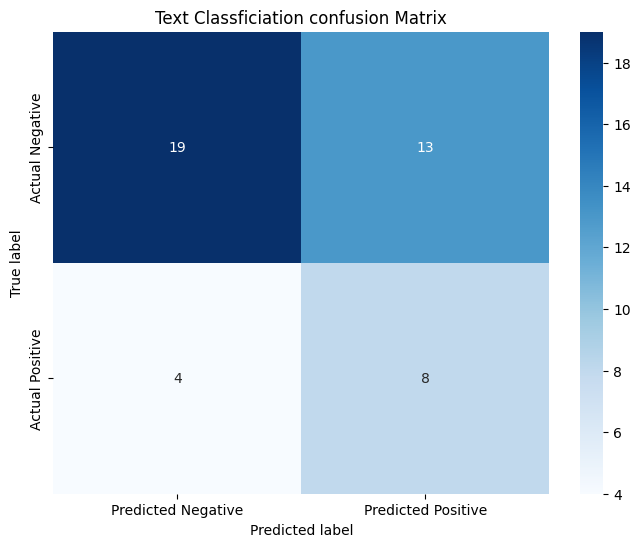

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

true_labels = hand_classified
predicted_labels = np.round(classification_result[:, 0])

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Text Classficiation confusion Matrix')
plt.show()